In [1]:
import requests
import pandas as pd
import numpy as np
import findspark
import pandas as pd
import numpy as np
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import*
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, BooleanType, DoubleType
from pyspark import SparkContext
from pyspark.sql.functions import monotonically_increasing_id
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession.builder.appName("Self_Employed_Approval").getOrCreate()

In [3]:
query= "(SELECT Self_Employed, (SUM(CASE WHEN Application_Status = 'Y' THEN 1 ELSE 0 END) / COUNT(*)) * 100  \
         AS yes_percentage FROM cdw_sapp_loan_application GROUP BY Self_Employed) as self_e"

sdf_selfe = spark.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                     user="root",\
                                     password="password",\
                                     url="jdbc:mysql://localhost:3306/capstone_project",\
                                     dbtable=query).load()

sdf_selfe.show()

+-------------+--------------+
|Self_Employed|yes_percentage|
+-------------+--------------+
|           No|       68.2540|
|          Yes|       65.7143|
+-------------+--------------+



In [12]:
#Convert spark dataframe to pandas dataframe
pdf_selfe = sdf_selfe.toPandas()
pdf_selfe.set_index('Self_Employed', inplace = True)
print(pdf_selfe['yes_percentage'].dtype)
pdf_selfe["yes_percentage"] = pdf_selfe["yes_percentage"].astype(float)
pdf_selfe

object


,yes_percentage
Self_Employed,
No,68.2540
Yes,65.7143


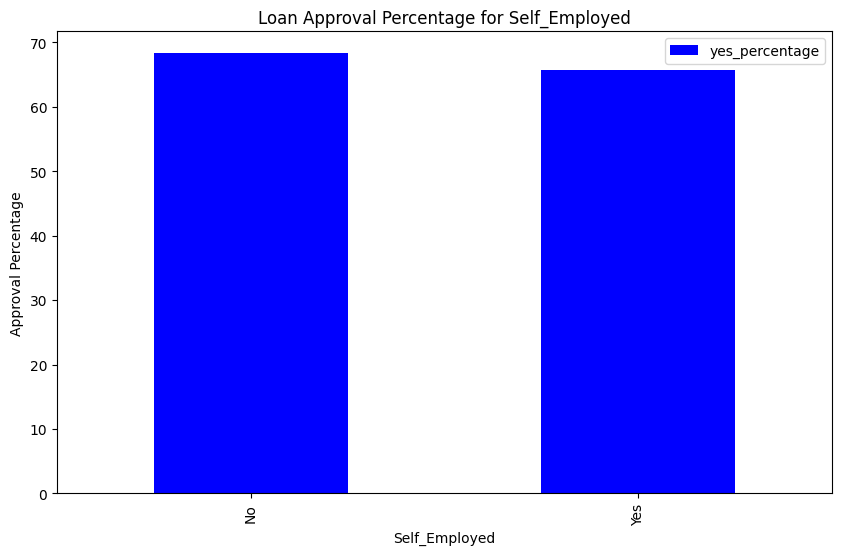

In [13]:
pdf_selfe.plot(kind='bar', figsize=(10, 6), color = 'blue')
plt.xlabel('Self_Employed')
plt.ylabel('Approval Percentage')
plt.title('Loan Approval Percentage for Self_Employed')
plt.show()